<a href="https://colab.research.google.com/github/spatidar2109/ML_Learing/blob/main/PCA_and_tSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
milk = pd.read_csv("/content/milk (1).csv",index_col=0)
milk.head()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(milk)
milkscaled=scaler.transform(milk)

from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(milkscaled)

In [2]:
principalComponents

array([[-2.43517478e+00, -2.31477535e-01,  3.30150277e-01,
         3.07663789e-01, -4.81844020e-02],
       [-2.25873578e+00, -6.93147702e-01,  2.90345634e-02,
        -8.10566235e-02,  5.31875986e-04],
       [-2.33586051e+00, -6.63328405e-01,  1.01257424e-01,
         2.47997451e-01, -1.01090469e-02],
       [-2.31867737e+00, -2.73814696e-01,  1.09881468e-01,
        -9.28730047e-02,  6.76869081e-03],
       [-2.06029437e+00, -1.01919913e+00, -7.62435692e-01,
        -5.10091168e-01, -2.93815549e-02],
       [-1.30153554e+00,  1.37302686e-01, -1.98742464e-01,
        -2.82160412e-01,  1.46681977e-02],
       [-1.28274231e+00,  6.22666596e-01,  2.53785220e-01,
         6.51479675e-02,  4.44863325e-02],
       [-5.05068322e-01,  8.82353252e-02,  8.38298039e-03,
         1.33774458e-01, -8.38059103e-02],
       [ 2.55501845e-01,  2.87373242e-01, -8.81856866e-01,
        -1.30998847e-02,  1.64841025e-02],
       [ 5.10084403e-02,  4.70135842e-01, -3.55676176e-01,
         1.05096967e+00

In [3]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_) 
print(pca.explained_variance_ratio_ * 100) 
print(pca.singular_values_) 

[4.0404117  0.92437238 0.13429088 0.1026886  0.00656977]
[0.77575905 0.1774795  0.02578385 0.01971621 0.0012614 ]
[77.57590469 17.74794969  2.57838496  1.97162103  0.12613963]
[9.84732862 4.71008886 1.79526633 1.56988098 0.39708253]


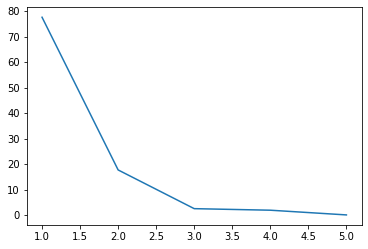

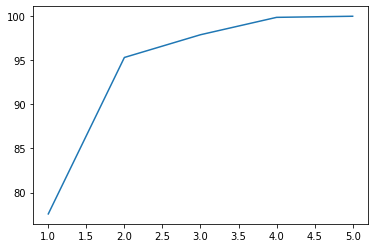

In [4]:
import matplotlib.pyplot as plt
y = pca.explained_variance_ratio_ * 100
x = np.arange(1,6)
plt.plot(x,y)
plt.show()

import matplotlib.pyplot as plt
y = np.cumsum(pca.explained_variance_ratio_ * 100)
x = np.arange(1,6)
plt.plot(x,y)
plt.show()

In [5]:
df_plot = pd.DataFrame(principalComponents,
                 columns = ['PC1', 'PC2','PC3','PC4','PC5'],
                 index = milk.index)

pca_loadings = pd.DataFrame(pca.components_.T, index=milk.columns, columns=['V1', 'V2','V3','V4','V5'] )
pca_loadings

,V1,V2,V3,V4,V5
water,-0.472944,0.352855,-0.369213,-0.108936,-0.709670
protein,0.466570,0.320941,-0.151962,0.786729,-0.193066
fat,0.448683,-0.476037,0.306992,-0.176604,-0.668311
lactose,-0.482891,0.059515,0.776426,0.384688,-0.111590
ash,0.352330,0.736435,0.378825,-0.435910,0.001187


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


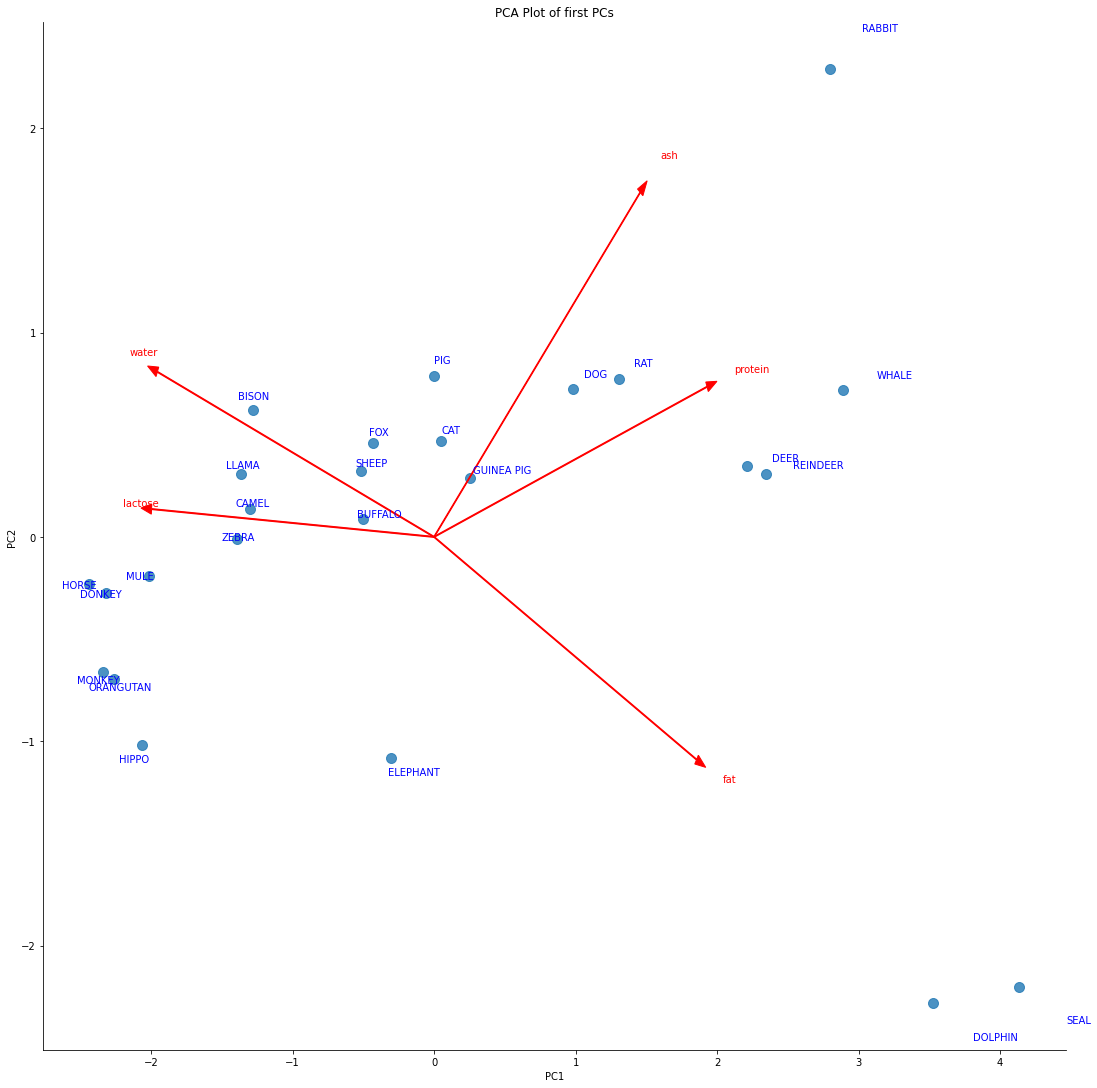

In [6]:
import seaborn as sns
 
 
# Scatter plot based and assigne color based on 'label - y'
sns.lmplot('PC1', 'PC2', data=df_plot, fit_reg = False, size = 15, scatter_kws={"s": 100})
 
# set the maximum variance of the first two PCs
# this will be the end point of the arrow of each **original features**
xvector = pca.components_[0]
yvector = pca.components_[1]
 
# value of the first two PCs, set the x, y axis boundary
xs = df_plot['PC1']
ys = df_plot['PC2']
 
## visualize projections
 
## Note: scale values for arrows and text are a bit inelegant as of now,
##       so feel free to play around with them
for i in range(len(xvector)):
    # arrows project features (ie columns from csv) as vectors onto PC axes
    # we can adjust length and the size of the arrow
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.005, head_width=0.05)
    plt.text(xvector[i]*max(xs)*1.1, yvector[i]*max(ys)*1.1,
             list(milk.columns.values)[i], color='r')
 
for i in range(len(xs)):
    plt.text(xs[i]*1.08, ys[i]*1.08, list(milk.index)[i], color='b') # index number of each observations
plt.title('PCA Plot of first PCs')
plt.show()

In [7]:
################### tSNE##################################

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


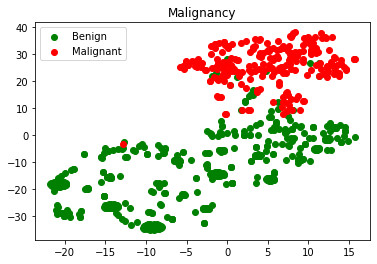

In [8]:
import numpy as np
import pandas as pd

df_original = pd.read_csv("/content/BreastCancer.csv")
df = df_original.iloc[:,:-1]
X = df.drop(['Code'],axis=1)
y = df_original.iloc[:,-1] 

# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=100,random_state=2019)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(X)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

xs_B = xs[y=="Benign"]
xs_M = xs[y=="Malignant"]

ys_B = ys[y=="Benign"]
ys_M = ys[y=="Malignant"]

import matplotlib.pyplot as plt

plt.scatter(xs_B,ys_B,c="green",label="Benign")
plt.scatter(xs_M,ys_M,c="red",label="Malignant")
plt.legend()
plt.title("Malignancy")
plt.show()

########################################################
X_tsne = pd.DataFrame(tsne_features,columns = ['C1', 'C2'])